As a part of the Truly End-to-End Machine Learning series, today, we will be taking a very close look at the GSMArena Devices Data with the help of exploratory data analysis (EDA). EDA is a set of tools and techniques which helps us summarize the main characteristics of a dataset with the help of quantitative and visual tools. In order to follow along with this tutorial, you need to have a cursory understanding of Pandas and Matplotlib. I have linked to resources to learn about these tools whenever possible. Please refer to these if you need help.

### A NOTE ON GITHUB

In order to follow along with this tutorial, you will need to clone the repo called **deviceparser**, from my [GitHub](https://github.com/vigvisw/devicedataparser) page. This repo contains the data and helper modules required to parse the information from the GSM Arena Dataset. To learn more how to build your own web crawler from scratch to collect data and also how to build a parser for your data, check out my previous [tutorial](https://github.com/vigvisw/end2endml). 

GitHub is an online version control tool, which uses the **git** protocol. It allows you to easily document and showcase your code as your iteratively improve upon it. Beyond just this tutorial, it is a very valuable skill to have in your arsenal. Please find the resources for learning more about GitHub Below

**Resources For Getting Started With GitHub**
1. A [quick introduction](https://www.youtube.com/watch?v=Loav1kbA640) by Siraj Raval
2. [GitHub from scratch](https://www.youtube.com/watch?v=BCQHnlnPusY&list=PLRqwX-V7Uu6ZF9C0YMKuns9sLDzK6zoiV) by The Coding Train (run by Daniel Shiffman, this is one of the best channels to learn anything related to programming).

### Getting The Data

Note that you can send a shell command in Jupyter Notebooks using **!** or **%** before the command.

In [1]:
# clone to repo to the current dicrectory
! git clone https://github.com/vigvisw/devicedataparser

Cloning into 'devicedataparser'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 42 (delta 13), reused 13 (delta 2), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [2]:
# verify that a new git folder has been created
! ls 

devicedataparser  sample_data


In [3]:
# change directory to the git folder and check out its contents
% cd ./devicedataparser
! ls

/content/devicedataparser
data
deviceparser_example.ipynb
deviceparser.py
devices_df_info.txt
myparsers.py
README.md
Truly_End_To_End_Machine_Learning_2_Towards_Creating_a_Dataset.ipynb


Begin by loading in the data, which is stored as a JSON text file in **data/devices_data.txt**. The **deviceparser** module has a number of useful methods for working with the devices data. The notebook, **deviceparser_example**, can be used as a quick start guide and you can check out the second tutorial in my *Truly End-To-End Machine Learning* series to gain a full understanding of how the module was built.

A library that we have not used thus far in this tutorial series is [**missingno**](https://github.com/ResidentMario/missingno). It is a very simple tool that builds on top of Pandas to provide the ability to visualize **null** values in a dataset. Check out the linked documentation for more information.

We will also be using [**seaborn**](https://seaborn.pydata.org/index.html), which sits on top of *matplotlib* and provides a number of visual and control improvements.

In [4]:
# these library comes pre-intalled in colab
! pip install missingno
! pip install seaborn

In [0]:
# import the required libraries
import deviceparser as dp
import myparsers as mp
import json 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# required to display images in the notebook
%matplotlib inline

# set the style used for plotting
plt.style.use('seaborn-whitegrid')

In [0]:
# load the JSON data as dict using the Device class 
file_path = '/content/devicedataparser/data/devices_data.txt'
devices_dict = dp.Device.read_devices_json(file_path)

In [7]:
# verify that the data has been loaded properly by check the keys of the dict
print(devices_dict.keys())

dict_keys(['Acer', 'alcatel', 'Allview', 'Amazon', 'Amoi', 'Apple', 'Archos', 'Asus', 'AT&T;', 'Benefon', 'BenQ', 'BenQ-Siemens', 'Bird', 'BlackBerry', 'Blackview', 'BLU', 'Bosch', 'BQ', 'Casio', 'Cat', 'Celkon', 'Chea', 'Coolpad', 'Dell', 'Emporia', 'Energizer', 'Ericsson', 'Eten', 'Fujitsu Siemens', 'Garmin-Asus', 'Gigabyte', 'Gionee', 'Google', 'Haier', 'Honor', 'HP', 'HTC', 'Huawei', 'i-mate', 'i-mobile', 'Icemobile', 'Infinix', 'Innostream', 'iNQ', 'Intex', 'Jolla', 'Karbonn', 'Kyocera', 'Lava', 'LeEco', 'Lenovo', 'LG', 'Maxon', 'Maxwest', 'Meizu', 'Micromax', 'Microsoft', 'Mitac', 'Mitsubishi', 'Modu', 'Motorola', 'MWg', 'NEC', 'Neonode', 'NIU', 'Nokia', 'Nvidia', 'O2', 'OnePlus', 'Oppo', 'Orange', 'Palm', 'Panasonic', 'Pantech', 'Parla', 'Philips', 'Plum', 'Posh', 'Prestigio', 'QMobile', 'Qtek', 'Razer', 'Realme', 'Sagem', 'Samsung', 'Sendo', 'Sewon', 'Sharp', 'Siemens', 'Sonim', 'Sony', 'Sony Ericsson', 'Spice', 'T-Mobile', 'TECNO', 'Tel.Me.', 'Telit', 'Thuraya', 'Toshiba', 'Un

As described in the previous tutorial, once the data has been loaded as a dict, we need to expose the **ParsingFunctions** class within **dp** to user defined parsing functions. They will be used to parsing columns and create new features which become part of the final dataset. As a starting point, I have made some parsers available within **myparsers.py**, which I will be using these for this tutorial. But, feel free to define your own. 

Remember that there are very strict rules for defining custom parsing functions, so that they work with **deviceparser**. I will not be covering them here and I expect you to be familiar with them using the previous tutorial as a guide.

In [8]:
# check the names of all custom functions in the MyParsers class
# note that all out function names start with 'parse_'
mp.MyParsers.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'MyParsers' objects>,
              '__doc__': 'A container class for housing all the parsing functions',
              '__module__': 'myparsers',
              '__weakref__': <attribute '__weakref__' of 'MyParsers' objects>,
              'parse_banner_batsize_hl': <function myparsers.MyParsers.parse_banner_batsize_hl>,
              'parse_banner_displayres_hl': <function myparsers.MyParsers.parse_banner_displayres_hl>,
              'parse_banner_displaysize_hl': <function myparsers.MyParsers.parse_banner_displaysize_hl>,
              'parse_banner_ramsize_hl': <function myparsers.MyParsers.parse_banner_ramsize_hl>,
              'parse_battery_talk_time': <function myparsers.MyParsers.parse_battery_talk_time>,
              'parse_body_dimensions': <function myparsers.MyParsers.parse_body_dimensions>,
              'parse_body_weight': <function myparsers.MyParsers.parse_body_weight>,
              'parse_display_type': <function 

In [9]:
# create a list of functions in MyParser
parsing_functions = [value for key, value in mp.MyParsers.__dict__.items() if re.compile('parse_*').match(key)]    
parsing_functions

[<function myparsers.MyParsers.parse_banner_batsize_hl>,
 <function myparsers.MyParsers.parse_banner_displayres_hl>,
 <function myparsers.MyParsers.parse_banner_ramsize_hl>,
 <function myparsers.MyParsers.parse_banner_displaysize_hl>,
 <function myparsers.MyParsers.parse_body_weight>,
 <function myparsers.MyParsers.parse_launch_status>,
 <function myparsers.MyParsers.parse_launch_announced>,
 <function myparsers.MyParsers.parse_body_dimensions>,
 <function myparsers.MyParsers.parse_display_type>,
 <function myparsers.MyParsers.parse_battery_talk_time>,
 <function myparsers.MyParsers.parse_platform_chipset>]

I prefer using [list comprehensions](https://www.youtube.com/watch?v=3dt4OGnU5sM) for terse code, but the same functionality can also be achieved by a more explicit for loop.

In [10]:
parsing_functions = []
for key, value in mp.MyParsers.__dict__.items():
  if re.compile('parse_*').match(key):
    parsing_functions.append(value)

parsing_functions

[<function myparsers.MyParsers.parse_banner_batsize_hl>,
 <function myparsers.MyParsers.parse_banner_displayres_hl>,
 <function myparsers.MyParsers.parse_banner_ramsize_hl>,
 <function myparsers.MyParsers.parse_banner_displaysize_hl>,
 <function myparsers.MyParsers.parse_body_weight>,
 <function myparsers.MyParsers.parse_launch_status>,
 <function myparsers.MyParsers.parse_launch_announced>,
 <function myparsers.MyParsers.parse_body_dimensions>,
 <function myparsers.MyParsers.parse_display_type>,
 <function myparsers.MyParsers.parse_battery_talk_time>,
 <function myparsers.MyParsers.parse_platform_chipset>]

In [11]:
# initalize ParsingFunctions, optionally clearing any exisiting parsers
dp.ParsingFunctions.clear_existing_parsers()
dp.ParsingFunctions.add_new_parsers(parsing_functions)
dp.ParsingFunctions.__dict__

All exisiting parsing functions have been cleared!


mappingproxy({'__dict__': <attribute '__dict__' of 'ParsingFunctions' objects>,
              '__doc__': 'A class for housing all the parsing function which will be used on device specs data',
              '__module__': 'deviceparser',
              '__weakref__': <attribute '__weakref__' of 'ParsingFunctions' objects>,
              'add_new_parsers': <classmethod at 0x7f0d48ce8a90>,
              'add_to_parsed_features': <classmethod at 0x7f0d48ce8b00>,
              'allow_parsing': ['banner_batsize_hl',
               'banner_displayres_hl',
               'banner_ramsize_hl',
               'banner_displaysize_hl',
               'body_weight',
               'launch_status',
               'launch_announced',
               'body_dimensions',
               'display_type',
               'battery_talk_time',
               'platform_chipset'],
              'clear_existing_parsers': <classmethod at 0x7f0d48ce8ac8>,
              'parse_banner_batsize_hl': <function myparsers.My

Now, we use the data in **devices_dict** to build a unique device object each of the 9500+ devices  in the GSMArena datababase. **deviceparser** comes with the useful method, **create_df()**, which takes **devices_dict** as an argument, to help with this process.

This multi-step function applies the parsing functions to each device and creates a list of all such device objects. Features such as battery capacity, screen resolution, num of processing cores, etc, present in one device may be absent in another. An internal dictionary keeps track of features collected across all devices which is in turn used to create the output DataFrame. All missing features are indicated by **np.NaN**.

In [12]:
# create the DataFrame an check out the names of the parsed columns
og_df = dp.Device.create_df(devices_dict)

parsed_features = dp.ParsingFunctions.parsed_features
print(parsed_features)

9536
{'talk_time_3g', 'display_type', 'talk_time', 'body_x', 'displayres_len', 'talk_time_2g', 'displaysize', 'body_z', 'launch_announced', 'platform_chipset_gate_width', 'displayres_height', 'batsize', 'body_y', 'display_type_category', 'platform_chipset', 'ramsize', 'launch_status', 'weight'}


Along with the parsed columns, we also want some other device information such as the device name and link.

In [0]:
# a list of the column names we want from the original df
cols_ = ['maker_name', 'device_name', 'device_link'] + list(parsed_features)

# get a slice of the original df using the above list
df = og_df[cols_]

In [14]:
# take a look at the first five samples 
df.head()

,maker_name,device_name,device_link,talk_time_3g,display_type,talk_time,body_x,displayres_len,talk_time_2g,displaysize,...,launch_announced,platform_chipset_gate_width,displayres_height,batsize,body_y,display_type_category,platform_chipset,ramsize,launch_status,weight
0,Acer,Chromebook Tab 10,https://www.gsmarena.com/acer_chromebook_tab_1...,NaT,"IPS LCD capacitive touchscreen, 16M colors",09:00:00,238.3,1536.0,NaT,9.7,...,2018-03-01,NaN,2048.0,4500.0,172.2,LCD,Rockchip RK3399,4.0,Available,544.3
1,Acer,Iconia Talk S,https://www.gsmarena.com/acer_iconia_talk_s-83...,NaT,"IPS LCD capacitive touchscreen, 16M colors",09:00:00,191.7,720.0,NaT,7.0,...,2016-08-01,NaN,1280.0,3400.0,101.0,LCD,Mediatek MT8735,2.0,Available,260.0
2,Acer,Liquid Z6 Plus,https://www.gsmarena.com/acer_liquid_z6_plus-8...,NaT,"IPS LCD capacitive touchscreen, 16M colors",NaT,153.8,1080.0,NaT,5.5,...,2016-08-01,28.0,1920.0,4080.0,75.6,LCD,Mediatek MT6753 (28 nm),3.0,Available,169.0
3,Acer,Liquid Z6,https://www.gsmarena.com/acer_liquid_z6-8304.php,NaT,"IPS LCD capacitive touchscreen, 16M colors",NaT,145.5,720.0,NaT,5.0,...,2016-08-01,28.0,1280.0,2000.0,72.5,LCD,Mediatek MT6737 (28 nm),1.0,Available,126.0
4,Acer,Iconia Tab 10 A3-A40,https://www.gsmarena.com/acer_iconia_tab_10_a3...,NaT,"IPS LCD capacitive touchscreen, 16M colors",NaT,259.0,1920.0,NaT,10.1,...,2016-01-01,NaN,1200.0,6100.0,167.0,LCD,Mediatek MT8163A,2.0,Available,NaN


In [0]:
# reorder the columns so that it is more intuitive to read
cols_ = 'maker_name device_name device_link launch_announced launch_status batsize body_x body_y body_z weight display_type display_type_category displayres_len displayres_height displaysize platform_chipset platform_chipset_gate_width ramsize talk_time talk_time_2g talk_time_3g'
df = df[[x for x in cols_.split(' ')]]

### The Fantastic Four: Numpy, Pandas, Matplotlib and Scikit-Learn

Before we dive into EDA, I want to point out a few resources for learning the tools of the trade. Akin to how each Infinity Stone allows you to control an aspect of the universe, [numpy](http://www.numpy.org/), [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) and [scikit-learn](https://scikit-learn.org/stable/), each allows you to control an aspect of data science and machine learning. 

1. **Numpy** is the core package for scientific computing in Python, which allows us to work with large, multi-dimensional arrays efficiently. All the other modules mentioned below are derived from the efficiency and memory benefits on numpy arrays.
2. **Pandas** offers a very intuitive way for manipulating data through the use of two core datastructures; Series and DataFrame. Pandes offers a more methods than you will ever need to manipulate data and in my opinion, the best way to learn about them is to practice with different datasets.
3. **Matplotlib** is Python's core plotting library. While it offers limited capability for producing 3D plots, where this library shines is in its ability to produce and fully customize 2D plots. From my personal experience, matplotlib's dual interface, one of which is state based and the other which is object oriented, can be confusing and I highly suggest that you take the time to understand how these are related to one another.
4. **Scikit-learn** is your best friend when it comes to implementing machine learning algorithms on your data. They have extensive documentation on their website and I urge you to check it out. We will be covering this library in the near future.

The best place to learn about these libraries is their documentation, linked above. However, the documentation can span across thousands of pages, each. The best resource that I have found for learning about these libraries, their methods, usage and quirks is the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas. It is open-source and covers each of these tools in detail with well documented code. In my opinion, going through this book is a much shorter path to getting an intermediate level understanding of each of these tools, when compared to scouring through the endless documentation. 

### Getting Starting Exploratory Data Analysis

While there are no fixed templates for what constitutes a good EDA, there are some general things that we can do to gather more information about our data. At this point, our mission is not to building a model  which can make accurate predictions. But instead, we want to ensure the integrity of the dataset by checking and accounting for any missing or abnormal values. Along with this, we can make use of plots to visualize any interesting patterns in the data. Identification of patterns is the core tenant of EDA and it not only helps with answering current questions, but it can show us hitherto relations between inputs and outputs. 

Before we can even begin EDA, there are two more steps we have to complete.

1. Identification and handling of [missing data](https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce).
2. Identification and handling of [outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

**1. Identification And Handling Of Missing Data**

The **DataFrame** comes with the handy **info()** method  which summarises the number of *non-null* values for us. This gives us an idea of how many valid data points are present in each column.

In [16]:
# df.info gives us an idea of the number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9536 entries, 0 to 9535
Data columns (total 21 columns):
maker_name                     9536 non-null object
device_name                    9536 non-null object
device_link                    9536 non-null object
launch_announced               9459 non-null datetime64[ns]
launch_status                  9536 non-null object
batsize                        9021 non-null float64
body_x                         9163 non-null float64
body_y                         9163 non-null float64
body_z                         9159 non-null float64
weight                         8560 non-null float64
display_type                   9532 non-null object
display_type_category          8438 non-null object
displayres_len                 9405 non-null float64
displayres_height              9405 non-null float64
displaysize                    8297 non-null float64
platform_chipset               4537 non-null object
platform_chipset_gate_width    2976 non-null 

We define a function called, **fraction_null** which is analogous to **df.info()**, but instead of telling us the number of non-null values, it tells us what fraction of columns are null. If you are using this data for a machine learning application, you may have to discard columns with a large number of missing values. I leave it up to the reader to modify this function so that you can specify a threshold fraction of missing values beyond which column names are not returned. You can use this to filter out columns which have too many missing values to be of use to us. We will not be dropping any columns in this case.

*Missingno* is a library which provides a very intuitive representation of what fraction of the data in each column is null. Missing data has many meanings behind it and should be treated carefully on a case by case basis. Depending on what you are using the data for, some of the columns may have to be dropped or filled in with an appropriate value, such as the mean. 

*Missingno* also provides a very handy method called **heatmap** to plot the [correlation](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/correlation-analysis/) between missing features. This can be incredibly useful to help you identify any patterns between missing data (i.e is the *missingness* of one related to another). As an example, *body_x* and *body_y* were created using the same parsing function from a string. If one is missing, then naturally, the other will also be missing and thus these two features have a perfect correlation coefficient of 1. Interestingly, the *missingness* of *talk_time* and *platform_chipset* are negatively corelated. After giving it some thought, I realized that this is because, in GSMArena (our data source), the *talk_time* for newer devices are reported in relation to whether the modem being used is 2G or 3G, instead of the generic "talk time". It is also common for these newer devices to have their chipset data reported. This explains the negative correlation. Thinking your way through plots and summaries can reveal very interesting insights into your data.

**Note:** Remember that even though *talk_time*, *talk_time_2g*, and *talk_time_3g* seem to have a lot of missing values, this is due to the way in which the data was collected. As a reminder, the parsing function we defined in the [previous](https://www.kaggle.com/vigvisw/towards-creating-a-dataset) tutorial for this feature returns a 2G or 3G time instead of *talk_talk* if it was not specified in a device's spec sheet. If we need to use this feature, it will have to be recombined with some logic later.

In [17]:
# define a quick function for finding out the fraction of null of null values
def fraction_null(df):
  '''A function for finding the fraction of null values for each column in a df'''
  num_rows = df.shape[0]
  print_text = ''
  fractions = []
  for _, values in df.iteritems():
    num_null = pd.isna(values).sum()
    # calculate the fraction of null values in a column
    fraction_null  = num_null/num_rows
    fractions.append(fraction_null)
  return pd.DataFrame({'Data Columns':df.columns, 'Fraction Null':fractions})
   
fraction_null(df)

,Data Columns,Fraction Null
0,maker_name,0.000000
1,device_name,0.000000
2,device_link,0.000000
3,launch_announced,0.008075
4,launch_status,0.000000
5,batsize,0.054006
6,body_x,0.039115
7,body_y,0.039115
8,body_z,0.039534
9,weight,0.102349


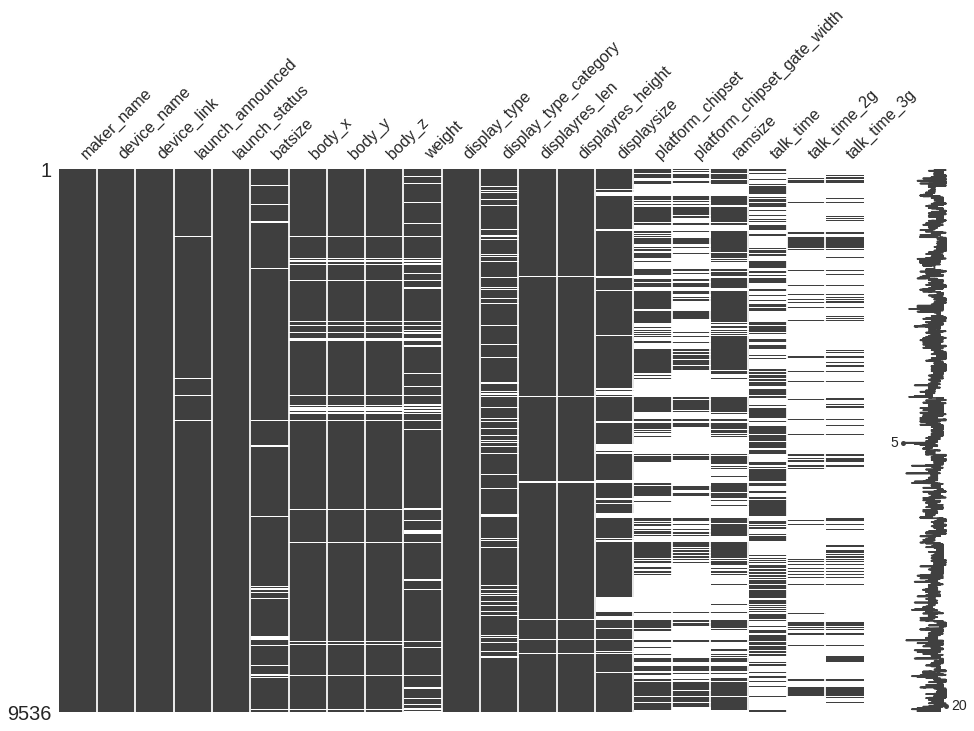

In [18]:
# we use missingno to get a visual representation of the null values
msno.matrix(df, figsize=(16, 10))

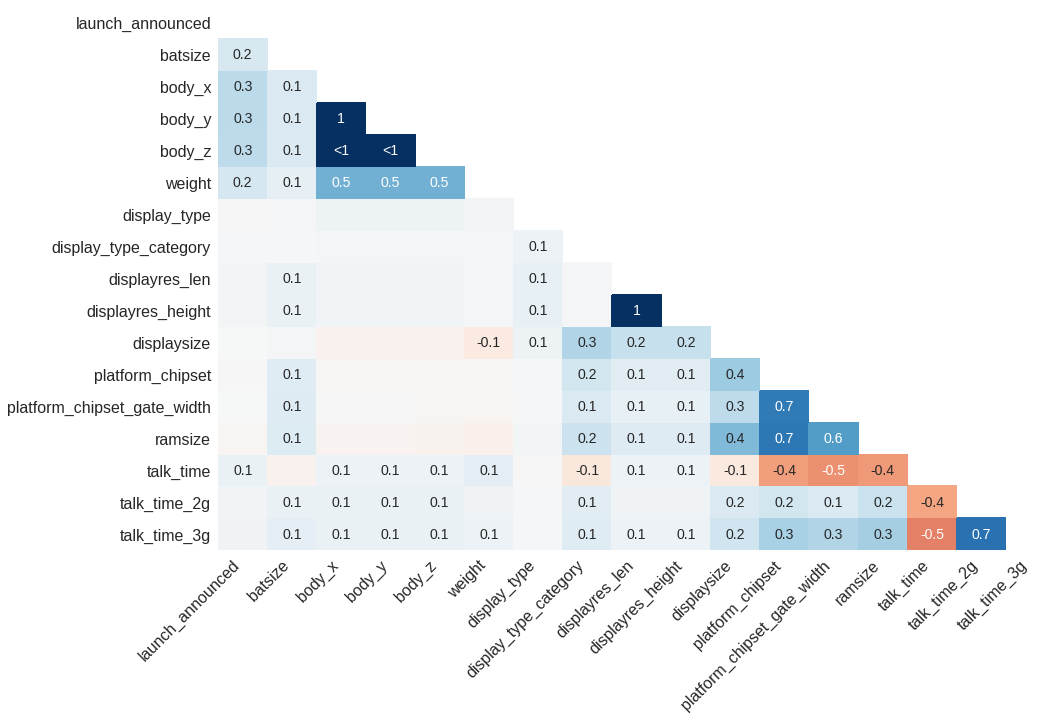

In [19]:
# corrolation between missing features using missingno
msno.heatmap(df, figsize=(15,10))

Since missing values have been accounted for in the dataset (atleast the subset we are using for this tutorial) by using **np.NaN** as a sentinel value, I will not be taking any global action but will deal with it when needed. You may have to take a different course of action at this point.

**Identification Of Outliers**

Outliers are anomalous data points which vary significantly from the rest of the data. They tend to skew your data and can have a significant impact on the mean, standard deviation and range. The consequence is that the sample you are using may not be representative of the population. Outliers creep into your dataset as a result of experimental error or due to actual variability in data. As with missing values, you want to be very careful when handling outliers.

In the last paragraph, we established that outliers "vary significantly" from the rest of the data. Based on your dataset and application, the thrsholds defining the lower and upper bounds which sets apart outliers will be different. Two quantitative measures which are commonly used to find outliers are the [Z-score](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/) and the [Interquartile range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range). I urge you to check out the attached resources to learn more about these metrics. The general rule of thumb is that a data point is considered an outlier if its Z-score is outside the range **+/- 3** OR if its value is outside the range **Q1 - 1.5 x IQR** or **Q3 + 1.5 x IQR**. Here, Q1 and Q3 are the first and third quartiles respectively and correspond to the **25%** and **75%** values when we view the summary statistics of a *DataFrame* using the **describe()** method.

I prefer to work with IQR for outlier identification because it can be nicely visualized with the help of [box plots](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data#box-whisker-plots).

In [20]:
# get the summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
batsize,9021,1878.48,1328.27,80,910,1500,2500,18000
body_x,9163,126.897,33.8248,23,105,119,144.8,451.8
body_y,9163,64.8442,24.4023,15.7,48.4,61.1,72,283.2
body_z,9159,13.2247,5.16173,4.7,9,12,16,75
weight,8560,143.87,92.9387,4,95,126,157,2005
displayres_len,9405,480.577,367.368,1,176,400,720,3840
displayres_height,9405,769.978,643.931,6,220,480,1280,4320
displaysize,8297,4.04482,1.91531,0.95,2.4,4,5.15,18.4
platform_chipset_gate_width,2976,25.9489,8.00475,7,28,28,28,65
ramsize,5490,118.876,204.619,1,1,3,128,768


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Screen Size (inches)')

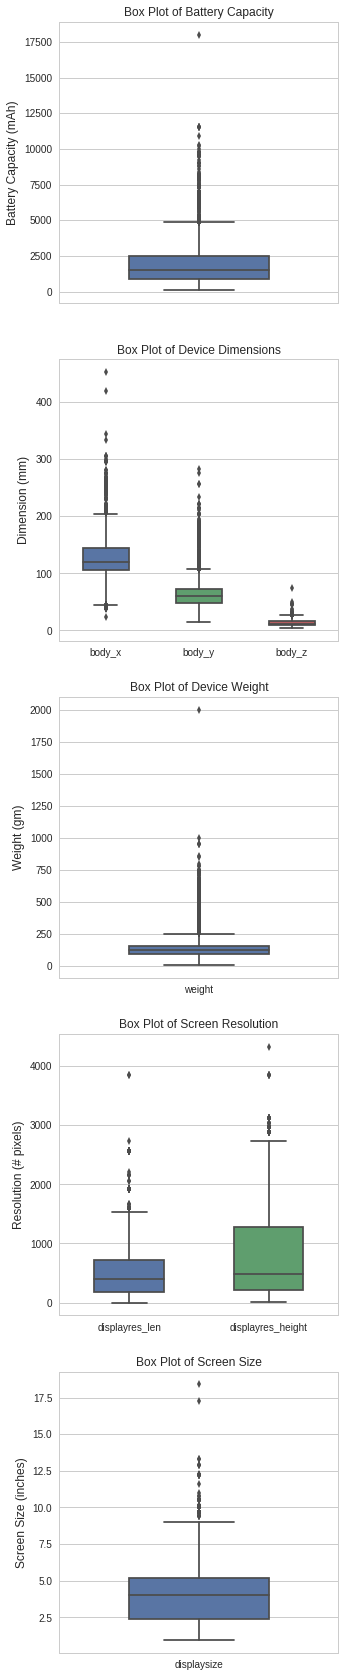

In [21]:
# visualize outliers in the our features using box plots 

n_plots = 5
fig, ax = plt.subplots(n_plots, figsize=(5, 6*n_plots))

# battery capacity
sns.boxplot(df['batsize'], orient='v', width=0.5, ax=ax[0])
ax[0].set_title('Box Plot of Battery Capacity', fontsize=12)
ax[0].set_ylabel('Battery Capacity (mAh)', labelpad=5, fontsize=12)

# device dimensions
sns.boxplot(df[['body_x', 'body_y', 'body_z']], orient='v', width=0.5, ax=ax[1])
ax[1].set_title('Box Plot of Device Dimensions', fontsize=12)
ax[1].set_ylabel('Dimension (mm)', labelpad=5, fontsize=12)

# device weight
sns.boxplot(df[['weight']], orient='v', width=0.5, ax=ax[2])
ax[2].set_title('Box Plot of Device Weight', fontsize=12)
ax[2].set_ylabel('Weight (gm)', labelpad=5, fontsize=12)

# display resolution 
sns.boxplot(df[['displayres_len', 'displayres_height']], orient='v', width=0.5, ax=ax[3])
ax[3].set_title('Box Plot of Screen Resolution', fontsize=12)
ax[3].set_ylabel('Resolution (# pixels)', labelpad=5, fontsize=12)

# display size
sns.boxplot(df[['displaysize']], orient='v', width=0.5, ax=ax[4])
ax[4].set_title('Box Plot of Screen Size', fontsize=12)
ax[4].set_ylabel('Screen Size (inches)', labelpad=5, fontsize=12)

From the box plots above, we can see that each of our features have a varying number of outliers. Again, depending on your dataset or use case, you might want to deal with these outliers differently. In the case of this dataset, we need to keep in mind that while most of the devices data we collected from GSMArena represents phones (smart and 'dumb'), there are some entries for larger devices such as tablets and others for much smaller devices such as smart watches. The dimensions and specs of these devices vary considerably from the others and hence appear to us as outliers. Outright dropping them would mean that we lose information about these devices. Since I consider this information to be valuable, I will not be taking any action against the outliers as we move forward in this tutorial.

**NOTE**: Boxplots will not work with a *timedelta* column out of the box (pun intended). You will have to convert the column into an appropriate format to visualize it.

### Ask, Explore, Infer & Repeat

One of the main reasons to do EDA is so that you can answer questions. To this end, we need to start by defining interesting questions and slowly start digging our way into the data to find the answers. Some of the questions that we want to answer today are:

1. How have the average specs of devices changed over the years? (i.e the trend)
1. What is the year-over-year growth rate of battery capacity in mobile devices since the year 2010?
2. Which devices have the highest and lowest battery capacity?
3. How has the average battery capacity of devices from different makers changed over time?
4. How has the battery capacity available per weight and the volume of the device changed over time?
5. Any other interesting correlation between variables? 

Let us try to answer these questions one by one.

**NOTE**: I have formulated these questions such that they demonstrate different techniques which can be used to answer questions. To keep the length of this tutorial manageable, I have stuck to only a few questions of interest. In reality, you will be asking similar questions for many different features, which may lead to dozens if not hundreds of plots. When presenting your work to others, chose only those plots which convey the most amount of information relevant to your audience.

Resources For Learning More About EDA

1. A very thorough [video walkthrough](https://www.youtube.com/watch?v=W5WE9Db2RLU&t=6111s) from PyCon 2017.
2. [Tutorial](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb) by Will Koehrsen.
3. A [tutorial](https://www.youtube.com/watch?v=KvZ2KSxlWBY) on data visualization from PyData 2017.


1. **How have the average specs of devices changed over the years?**

If a  **datetime** colum is present, we can check if there have been any trends in the features over time. To help analyze these trends, we will define a function which takes in a special DataFrame This special DataFrame has an index of the dtype **datetime64**, which will be used to create the x-axis of the plot. We will make each plot its own subplot so that we can compare how the actual value of a spec changed over time.

In [0]:
temp_df = df[['batsize', 'body_x', 'body_y', 'body_z', 'weight']]
temp_df.index = df.launch_announced
y_labels = ['Battery Capacity (mAh)', 'Device Length (mm)', 'Device Width (mm)'\
            , 'Device Thickness (mm)', 'Device Weight (gm)']

def plot_trend(df, agg='mean'):
  '''A function for plotting the trend in data over a number of years
  
     The index of the df must be a datetime series 
  '''
  grouped_df = df.groupby(df.index.year).agg({col:agg for col in df.columns})

  # initalize the plot information
  nrows = len(df.columns)
  ncols = 1
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 25))
  fig.subplots_adjust(hspace=0.5)

  for i, (col_name, values) in enumerate(grouped_df.iteritems()):
    ax[i].plot(grouped_df.index, values, color='teal')
    ax[i].set_xlabel('Year', labelpad=15, fontsize=12)
    ax[i].set_xticks(list(grouped_df.index))
    ax[i].set_xticklabels(list(grouped_df.index), rotation=90)
    ax[i].set_xlim((grouped_df.index.min(), grouped_df.index.max()))
    ax[i].set_ylabel(y_labels[i], labelpad=15, fontsize=12)
    ax[i].set_title('Change in {} of devices over {} years'\
                    .format(col_name,np.int64(grouped_df.index.max() - grouped_df.index.min()))\
                    , pad=6\
                   )

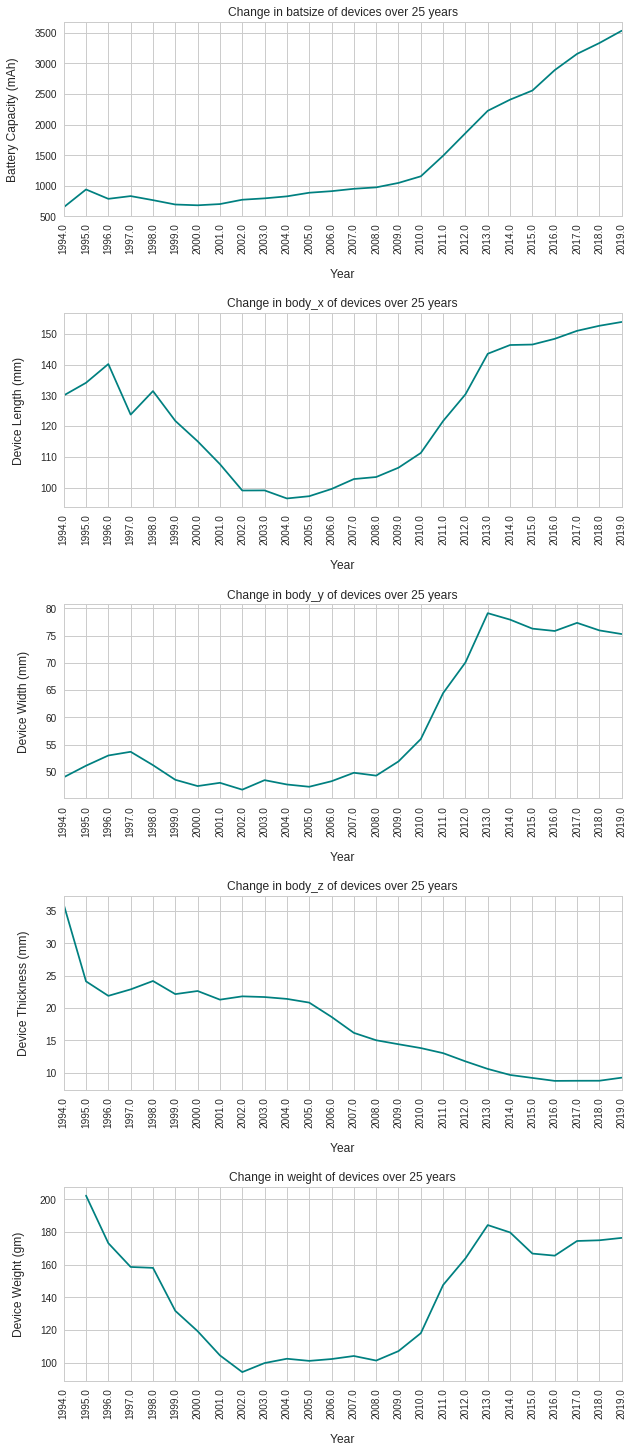

In [23]:
plot_trend(temp_df)

The above plot provides a very useful summary of how some of the average values of specs of devices have been changing over the past two decades. Depending on the questions that you are trying to answer, some of these plots may be more interesting to you than others. As a materials scientist, I find batteries fascinating and it is good to see that since 2010, the average battery capacity of devices has been steadily growing. This is despite the fact that the space available inside the device has been taken up by more and more components.

**2. What is the year-over-year growth rate of battery capacity in mobile devices since the year 2010?**


We can clearly see from the time-series plots above that average battery capacity in our devices have been growing steadily since 2010. There is clearly a linear relationship with time, which can be used to find the [year-over-year]() growth of battery capacity.

Average yearly incrase in capacity since 2010 is 248.77 mAh/year


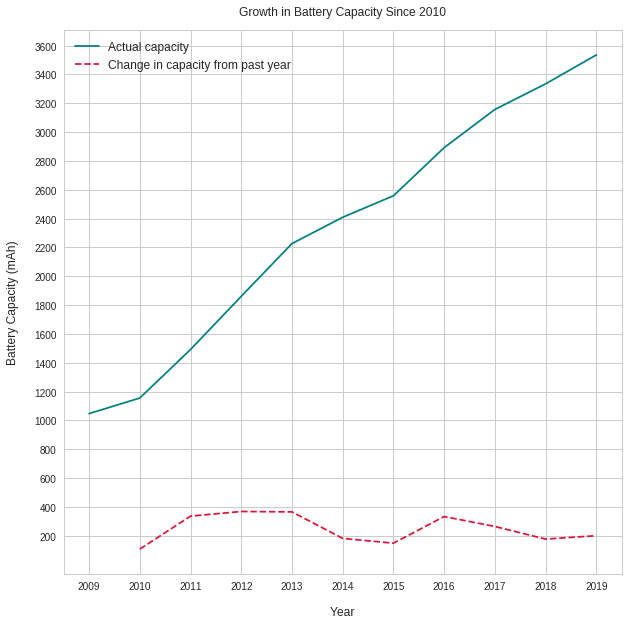

In [24]:
# group the devices by year and calculate the mean of the batsize col for each group
batsize_trend = df.groupby(df['launch_announced'].dt.year).agg({'batsize':'mean'})
s = batsize_trend[2009:]

# find how much the capacity changed compared to the past year
s_diff = s.rolling(2).apply(lambda x: x[1] - x[0])
# find the average increase per year 
print('Average yearly incrase in capacity since 2010 is {} mAh/year'.format(np.round(s_diff.mean().values[0], 2)))
            
# plot the data from 2009 - 2019
plt.figure(figsize=(10, 10))
plt.title('Growth in Battery Capacity Since 2010', pad= 15, fontsize=12)
plt.plot(s , color='teal', label='Actual capacity')
plt.plot(s_diff, color='crimson', linestyle='--' , label='Change in capacity from past year')
plt.xlabel('Year', labelpad=15, fontsize=12)
plt.xticks(s.index)
plt.ylabel('Battery Capacity (mAh)', labelpad=15, fontsize=12)
plt.yticks(np.arange(200, 3800, 200))
plt.legend(fontsize=12)
plt.grid(True)

Using this method, we found that the battery capacity of our devices has been growing at a rate of 248.77 mAh/year. With a bit of code, we were able to answer our question as well as generate a nice plot to go along with it. We will proceed full steam ahead and answer the rest of the questions.

**3. Which devices have the highest and lowest battery capacity?**

In [0]:
# drop null values and sort according to battery capacity 
col_name = 'batsize'
temp_df = df.dropna(subset=[col_name]).sort_values(col_name)

The data is sorted in *ascending* order by default and therefore the **head()** and **tail()** methods should tell us which devices have the lowest and highest battery capacities, respectively.

In [26]:
# find the devices with the lowest battery capacities
temp_df.head()

,maker_name,device_name,device_link,launch_announced,launch_status,batsize,body_x,body_y,body_z,weight,...,display_type_category,displayres_len,displayres_height,displaysize,platform_chipset,platform_chipset_gate_width,ramsize,talk_time,talk_time_2g,talk_time_3g
2581,Huawei,Fit,https://www.gsmarena.com/huawei_fit-8411.php,2016-11-01,Available,80.0,39.4,39.4,11.2,35.0,...,MONO,208.0,208.0,1.04,NaN,NaN,NaN,NaT,NaT,NaT
512,Allview,Allwatch,https://www.gsmarena.com/allview_allwatch-8542...,2016-11-01,Available,100.0,39.0,31.0,8.4,40.0,...,MONO,128.0,128.0,1.28,NaN,NaN,NaN,NaT,NaT,NaT
491,Allview,Allwatch V,https://www.gsmarena.com/allview_allwatch_v-93...,2018-06-01,Available,130.0,42.0,40.0,9.4,39.0,...,LCD,240.0,240.0,1.30,NaN,NaN,NaN,NaT,NaT,NaT
2522,Huawei,Watch Magic,https://www.gsmarena.com/huawei_watch_magic-94...,2018-11-01,Available,178.0,42.8,42.8,9.8,32.5,...,OLED,390.0,390.0,1.20,NaN,NaN,16.0,NaT,NaT,NaT
488,Allview,Allwatch Hybrid S,https://www.gsmarena.com/allview_allwatch_hybr...,2018-12-01,Available,200.0,50.6,44.0,14.6,88.0,...,LCD,240.0,240.0,1.22,NaN,NaN,NaN,NaT,NaT,NaT


In [27]:
# find the devices with the highest battery capacities
temp_df.tail()

,maker_name,device_name,device_link,launch_announced,launch_status,batsize,body_x,body_y,body_z,weight,...,display_type_category,displayres_len,displayres_height,displaysize,platform_chipset,platform_chipset_gate_width,ramsize,talk_time,talk_time_2g,talk_time_3g
741,Apple,iPad 4 Wi-Fi,https://www.gsmarena.com/apple_ipad_4_wi_fi-50...,2012-11-01,Discontinued,11560.0,241.2,185.7,9.4,652.0,...,LCD,1536.0,2048.0,9.7,Apple A6X (32 nm),32.0,1.0,10:00:00,NaT,NaT
742,Apple,iPad 4 Wi-Fi + Cellular,https://www.gsmarena.com/apple_ipad_4_wi_fi_+_...,2012-11-01,Discontinued,11560.0,241.2,185.7,9.4,662.0,...,LCD,1536.0,2048.0,9.7,Apple A6X (32 nm),32.0,1.0,09:00:00,NaT,NaT
744,Apple,iPad 3 Wi-Fi + Cellular,https://www.gsmarena.com/apple_ipad_3_wi_fi_+_...,2012-03-01,Discontinued,11560.0,241.2,185.7,9.4,662.0,...,LCD,1536.0,2048.0,9.7,Apple A5X (45 nm),45.0,1.0,09:00:00,NaT,NaT
745,Apple,iPad 3 Wi-Fi,https://www.gsmarena.com/apple_ipad_3_wi_fi-46...,2012-03-01,Discontinued,11560.0,241.2,185.7,9.4,652.0,...,LCD,1536.0,2048.0,9.7,Apple A5X (45 nm),45.0,1.0,10:00:00,NaT,NaT
1841,Energizer,Power Max P18K Pop,https://www.gsmarena.com/energizer_power_max_p...,2019-02-01,Coming soon,18000.0,NaN,NaN,NaN,NaN,...,LCD,1080.0,2280.0,6.2,Mediatek Helio P70 (12nm),NaN,6.0,NaT,NaT,NaT


The devices with the smallest capacities in our dataset are, unsurprisingly, smart watches. The small form factor of these devices limits the size of the battery which can be placed within them. The device with the smallest capacity in our dataset is the *Huawei	Fit* with a tiny battery of only 80 mAh.

Similarly, the devices with the largest capacities are mostly tablets, where the larger form factor allows for a larger battery. The winner in the category is *Power Max P18K Pop*, which of cource is from the battery manufacturer *Energizer*

**4. How has the average battery capacity of devices from different makers changed over time?**

In [28]:
# group the devices by year announced and maker name then find the mean of the battery capacity
temp_df= df.dropna(subset=[col_name])\
           .groupby([df['launch_announced'].dt.year, 'maker_name'])\
           .agg({'batsize':'mean', 'device_name':'count'})


# reset the index to flatten the heirerchial index
temp_df.reset_index(level=1, inplace=True)
temp_df.head()

,maker_name,batsize,device_name
launch_announced,,,
1994.0,Ericsson,650.000000,1
1995.0,Ericsson,996.428571,7
1995.0,Nokia,550.000000,1
1996.0,Bosch,600.000000,3
1996.0,Ericsson,1133.333333,3


To visualize this data we will use the data dense **jointplot** from *Seaborn*. Note that in this context, **device_name** refers to the number of devices made by a maker in any given year. You can rename the column if you want for clarity.

[Text(0.0, 0, '1994.0'),
 Text(0.5, 0, '1995.0'),
 Text(1.0, 0, '1996.0'),
 Text(0, 0, '1997.0'),
 Text(0, 0, '1998.0')]

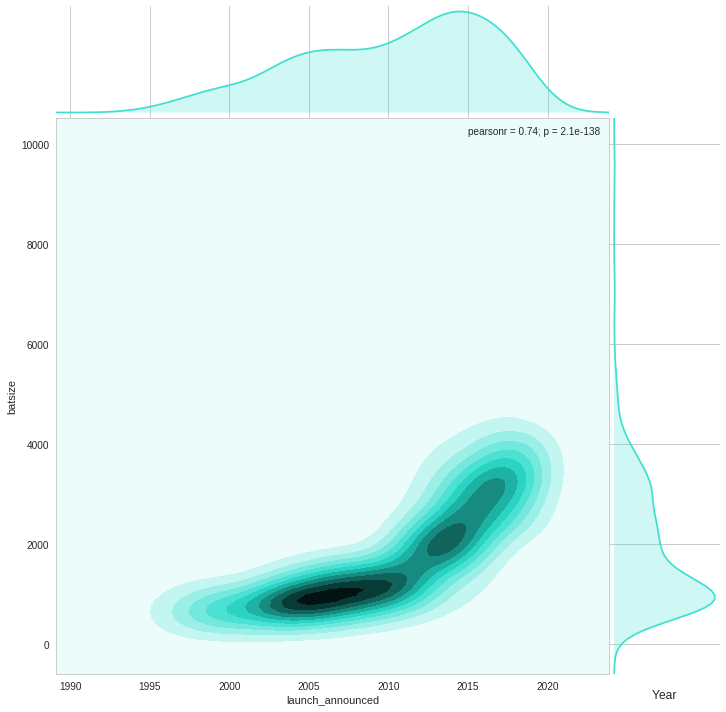

In [29]:
# make a jointplot of the above data
sns.jointplot(x=temp_df.index, y=temp_df['batsize'],color='turquoise', size=10, space=0, kind='kde')
ax = plt.gca()
ax.set_xlabel('Year',  labelpad=15, fontsize=12)
ax.set_xticklabels(temp_df.index.unique(), rotation=90)

This type of plot is called a [kernel density estimate (kde)](https://www.youtube.com/watch?v=-Lt7kpTM-v8). We are trying to visualize how the variation of one variable (i.e time), affects another variable (i.e battery capacity). Now we add a third dimension in the form of grouping the average battery capacity by maker name. In the plot, darker regions indicate places where more data points tend to line up. We can see that between 2005 - 2010, the average battery capacity of phones hovered around 1000 mAh.  Additionally, since we used a third dimension, the clustered data for this time period indicated that most makers we making phones with around the same capacity. Starting from 2010, the average battery capacity has been going up, and along with this, the average battery capacity of devices releases by different makers has also become more spread out as indicated by the darker and lighter blobs in the graph.

We also get to see the Pearson correlation coefficient of the two variables. In this case, we get a value of 0.7 indicating a strong relationship between the variables. This agrees well with our earlier observation that battery capacity has been showing year-over-year growth.

The top and right subpanels of the plot are the kde plots of the individual variables. Remember that we grouped the data by makers, so the univariate plots are not an accurate representation of the full dataset. But, it is close enough to get an idea of actual distribution. A sanity check has been performed below.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5, 0, 'Battery Capacity (mAh)')

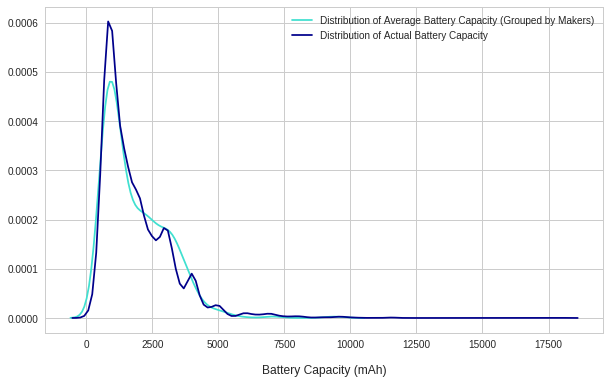

In [30]:
# taking a closer look at the right univariate kde plot
plt.figure(figsize=(10, 6))
sns.kdeplot(temp_df['batsize'], label='Distribution of Average Battery Capacity (Grouped by Makers)', color='turquoise')
sns.kdeplot(df['batsize'], label='Distribution of Actual Battery Capacity', color='darkblue')
plt.xlabel('Battery Capacity (mAh)', labelpad=15, fontsize=12)

Both the distributions approximately mirror each other.

**5. How has the battery capacity available per weight and the volume of the device changed over time?**

In [31]:
# calculate the volume of the device in cm3 and find the mAh per cm3
df['volume_cm3'] = df['body_x'] * df['body_y'] * df['body_z'] * 0.001
df['mAh_per_cm3'] = df['batsize']/df['volume_cm3'] 

# find the mAh per gram
df['mAh_per_gm'] = df['batsize']/df['weight']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9536 entries, 0 to 9535
Data columns (total 24 columns):
maker_name                     9536 non-null object
device_name                    9536 non-null object
device_link                    9536 non-null object
launch_announced               9459 non-null datetime64[ns]
launch_status                  9536 non-null object
batsize                        9021 non-null float64
body_x                         9163 non-null float64
body_y                         9163 non-null float64
body_z                         9159 non-null float64
weight                         8560 non-null float64
display_type                   9532 non-null object
display_type_category          8438 non-null object
displayres_len                 9405 non-null float64
displayres_height              9405 non-null float64
displaysize                    8297 non-null float64
platform_chipset               4537 non-null object
platform_chipset_gate_width    2976 non-null 

Remember that any mathematical operation performed on a *NaN* is also *NaN*. This takes care of any missing values between columns when performing vectorized operations. However, I suggest that you be very careful if you are not dropping *NaN*'s.

Text(0.5, 1.0, 'Change in Average Battery Capacity per Volume')

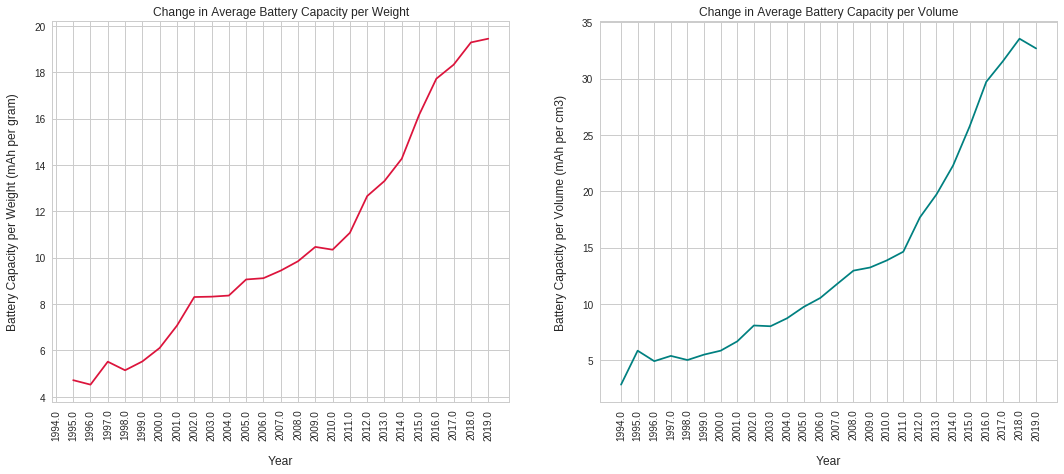

In [32]:
# plot the data 
temp_df = df.groupby(df['launch_announced'].dt.year).agg({'batsize':'mean', 'mAh_per_gm':'mean', 'mAh_per_cm3':'mean'})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
ax[0].plot(temp_df.index, temp_df['mAh_per_gm'], 'crimson', label='mAh_per_gm')
ax[0].set_xticklabels(temp_df.index, rotation=90)
ax[0].set_xticks(temp_df.index)
ax[0].set_xlabel('Year', labelpad=15, fontsize=12)
ax[0].set_xlabel('Year', labelpad=15, fontsize=12)
ax[0].set_ylabel('Battery Capacity per Weight (mAh per gram)', labelpad=15, fontsize=12)
ax[0].set_title('Change in Average Battery Capacity per Weight',  fontsize=12)

ax[1].plot(temp_df.index, temp_df['mAh_per_cm3'], 'teal', label='mAh_per_cm3')
ax[1].set_xticklabels(temp_df.index, rotation=90)
ax[1].set_xticks(temp_df.index)
ax[1].set_xlabel('Year', labelpad=15, fontsize=12)
ax[1].set_ylabel('Battery Capacity per Volume (mAh per cm3)', labelpad=15, fontsize=12)
ax[1].set_title('Change in Average Battery Capacity per Volume', fontsize=12)

It is clear from these two plots that, even when we account for the increased weight and volume of devices, OEMs have been packing more energy into our devices. 

As a bonus, we will make a scatter plot of the battery capacity as a function of both weight and volume to see any relationships. 

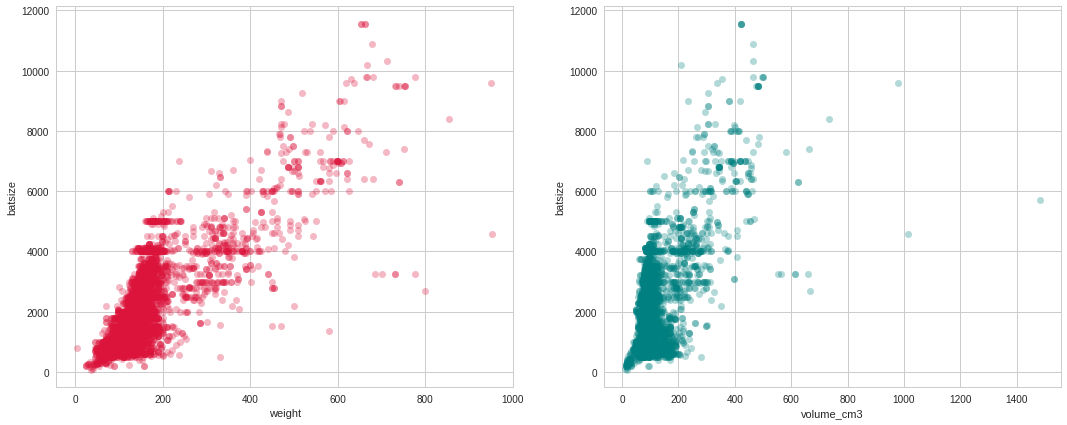

In [33]:
fig, ax_ = plt.subplots(nrows=1, ncols=2,figsize=(18, 7))
sns.regplot(df['weight'], df['batsize'], ax=ax_[0], fit_reg=False,  color='crimson', scatter_kws={'alpha':0.3})
sns.regplot(df['volume_cm3'], df['batsize'], ax=ax_[1], fit_reg=False, color='teal', scatter_kws={'alpha':0.3})

This scatter plot tells us that most devices have a "sweet spot" for weight and volume. This makes intuitive sense because most smart and 'dumb' phones have similar form factors. The vertical bands where a large number of data points cluster, in both these plots, is indicative of the continuing improvements being in packing more energy into a smaller form factor.

**6. Any other interesting correlation between variables?**

Using the power or *seaborn*, we can make pairplots between all the variables in our dataset. This is usually the last set that I do at the end of an EDA to check if there are any other interesting relations which I may have missed out on.

In [34]:
# get a subset of the parsed features for pair wise plotting
# only select columns where non null values >= tresh
not_null_tresh = 0.9
pair_cols = []
for col_name, values in df.iteritems():
  # select col if dtype is float64 and col has more 90% non-null values
  frac_not_null = values.notna().sum()/values.shape[0]
  if (values.dtype == 'float64') and frac_not_null >= not_null_tresh:
    pair_cols.append(col_name)
    
temp_df = df[pair_cols]
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9536 entries, 0 to 9535
Data columns (total 8 columns):
batsize              9021 non-null float64
body_x               9163 non-null float64
body_y               9163 non-null float64
body_z               9159 non-null float64
displayres_len       9405 non-null float64
displayres_height    9405 non-null float64
volume_cm3           9159 non-null float64
mAh_per_cm3          8727 non-null float64
dtypes: float64(8)
memory usage: 596.1 KB


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


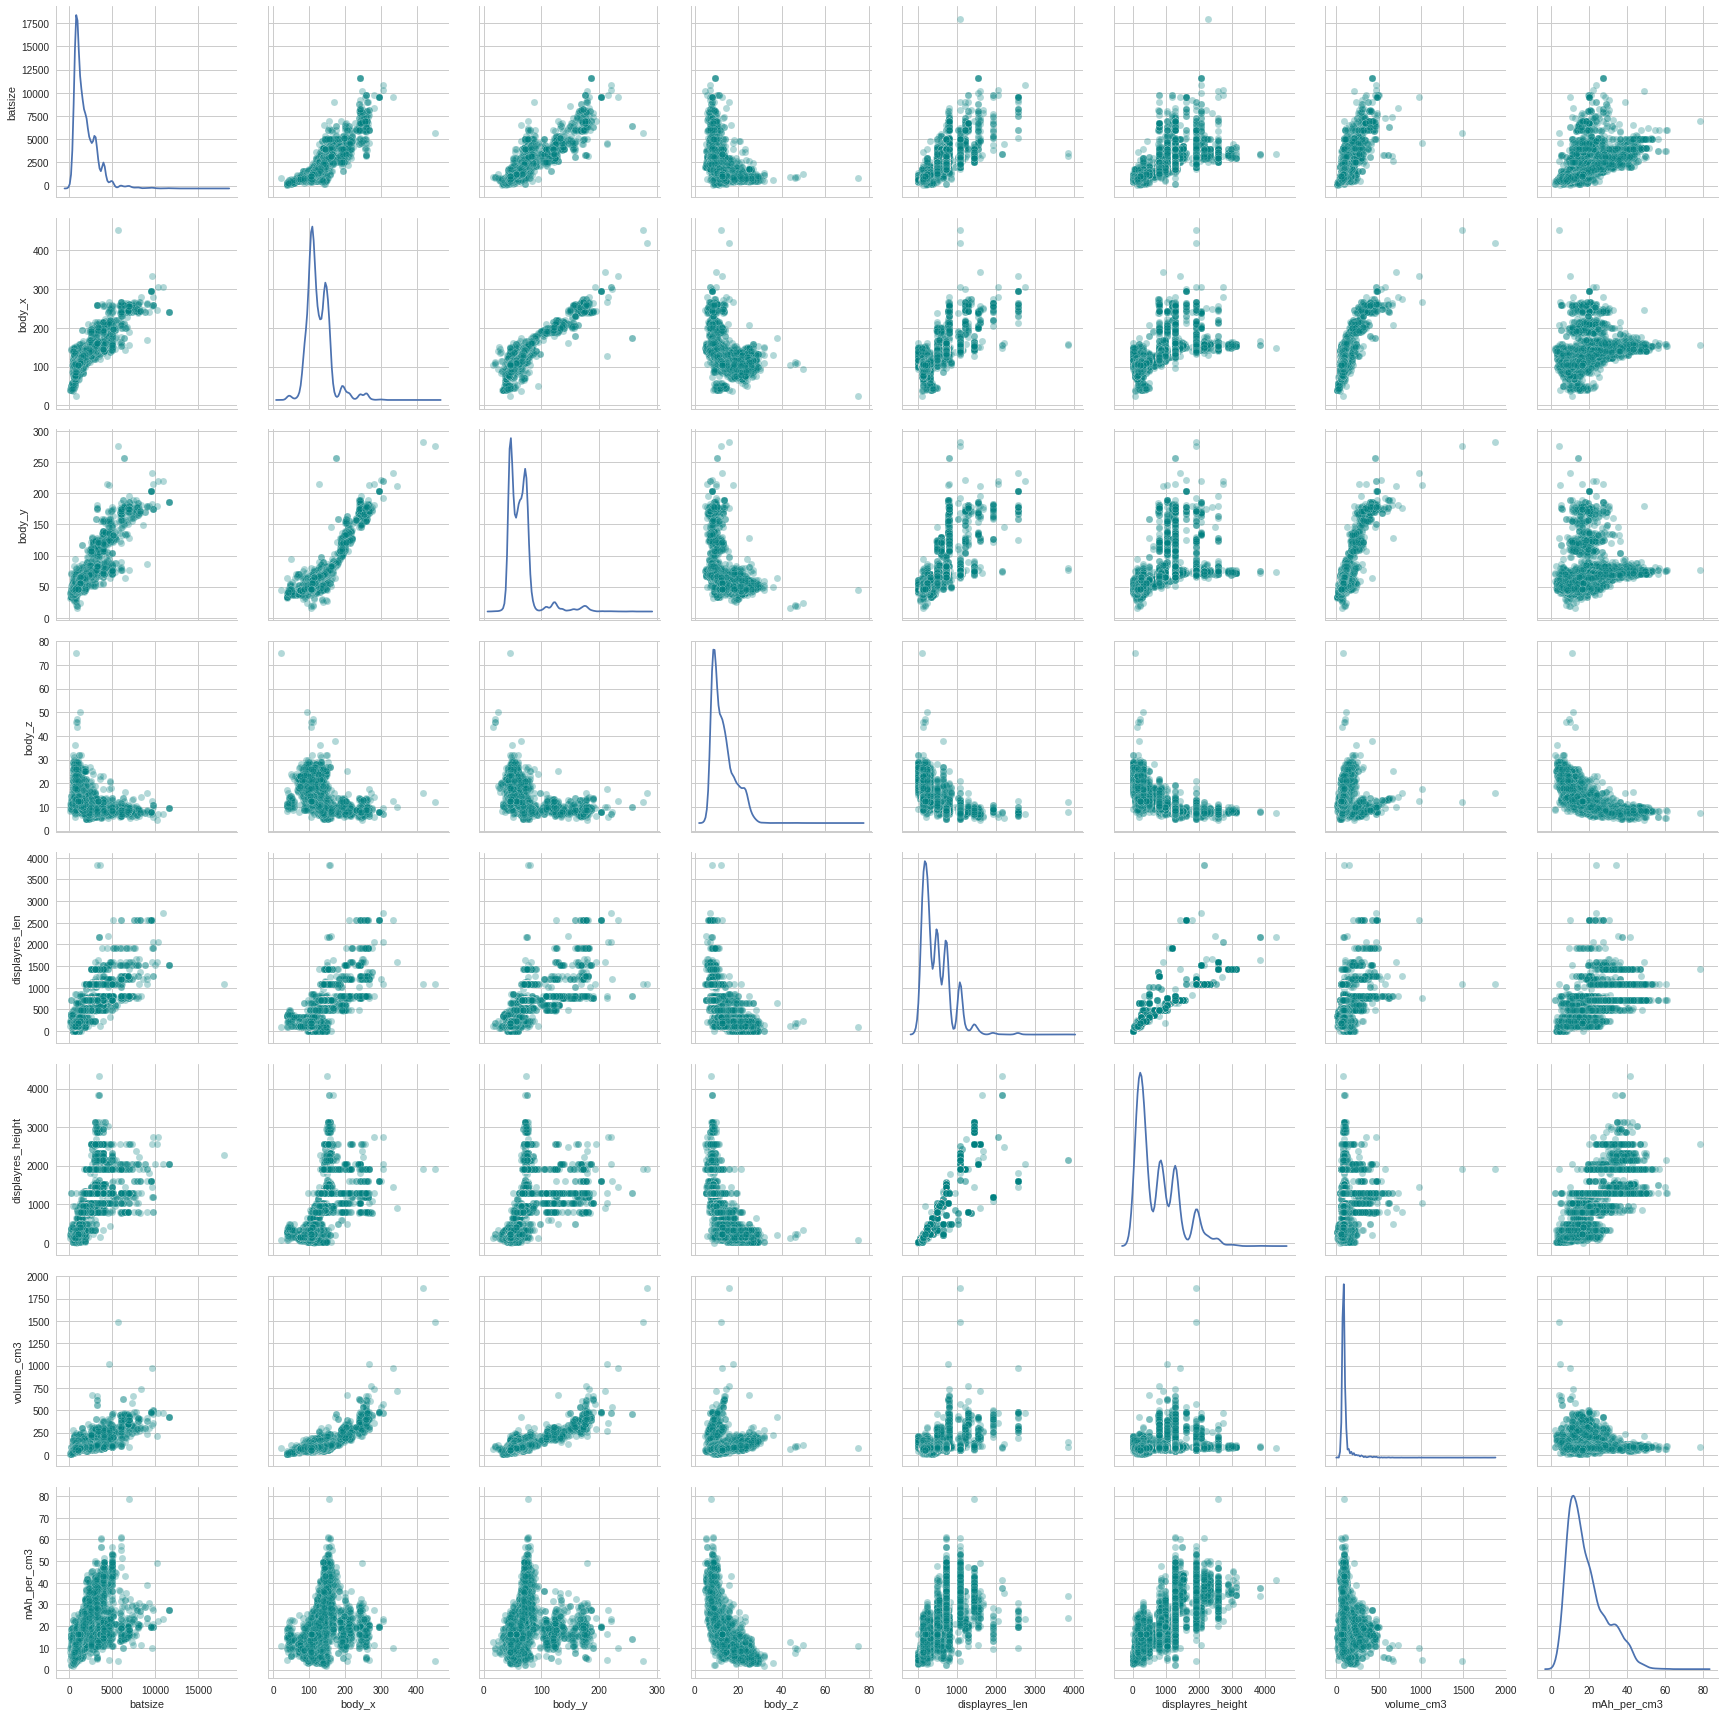

In [35]:
sns.pairplot(temp_df, diag_kind='kde', size=3, plot_kws={'color':'teal', 'alpha':0.3})

For those of you who are more quantitatively inclined, we can plot a heatmap of the correlation matrix to see how these pairs of variables are related. This matrix puts a number to visual relations we see in the pair plot above.

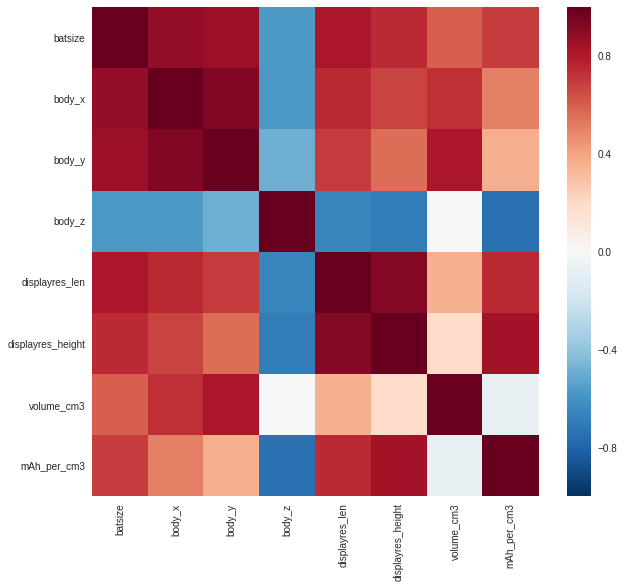

In [36]:
corr = temp_df.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr)

There is one interesting relationship that is immediately visible thanks to the heatmap. The body thickness (*body_z*) shows a negative correlation with almost all other features. This makes sense because there has been a continuous push for thinner smartphones while all other specs such as the display size and battery size have been steadily increasing over the years.

### Concluding Remarks

While there is a LOT more that could be done to explore this dataset, we will stop now, so that this tutorial can be kept at a manageable length. To recap, we learned how to identify, visualize and handle missing data and outliers in a dataset using a *seaborn* and *missingno*. Then we proceeded to do EDA by first defining questions we wanted to find answers for from the dataset. Through the magic of *pandas*, we slowly dug our way into the data and found the answers we were looking for. To help us and others understand the nature of variables in our data, we employed a number of different plots and drew insight from it.

If you are interested in building a machine learning model, the next step would be to use what you learned from EDA in order to engineer features which can be fed into the model to make a prediction. Feature engineering will be the focus of our next tutorial where we will slowly start moving into the realm of machine learning.

As always, you can find the latest information regarding the release of my tutorials on my [LinkedIn]('https://www.linkedin.com/in/vigvisw/') or [GitHub](https://github.com/vigvisw) page.